## 1️⃣ Project Goal

- Define the business problem
- State the analysis objective
- List key analytical questions

- This analysis investigates the relationship between lifestyle factors and sleep disorders.


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
df = pd.read_csv('sleep_health_and_lifestyle.csv')

## 2️⃣ Dataset Overview


In [56]:
df.shape
# The dataset contains 374 individuals with 13 features including demographic, physiological, and lifestyle indicators.

# data types
df.dtypes
'''
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
'''

# Statistical Summary
df.describe()
'''
Person ID	Age	Sleep Duration	Quality of Sleep	Physical Activity Level	Stress Level	Heart Rate	Daily Steps
count	374.000000	374.000000	374.000000	374.000000	374.000000	374.000000	374.000000	374.000000
mean	187.500000	42.184492	7.132086	7.312834	59.171123	5.385027	70.165775	6816.844920
std	108.108742	8.673133	0.795657	1.196956	20.830804	1.774526	4.135676	1617.915679
min	1.000000	27.000000	5.800000	4.000000	30.000000	3.000000	65.000000	3000.000000
25%	94.250000	35.250000	6.400000	6.000000	45.000000	4.000000	68.000000	5600.000000
50%	187.500000	43.000000	7.200000	7.000000	60.000000	5.000000	70.000000	7000.000000
75%	280.750000	50.000000	7.800000	8.000000	75.000000	7.000000	72.000000	8000.000000
max	374.000000	59.000000	8.500000	9.000000	90.000000	8.000000	86.000000	10000.000000
'''

# our variable target is sleep disorder column!
df['Sleep Disorder'].value_counts()
'''
Sleep Disorder
Sleep Apnea    78
Insomnia       77
'''

'\nSleep Disorder\nSleep Apnea    78\nInsomnia       77\n'

## 3️⃣ Data Cleaning & Preparation


C:\Users\Active\AppData\Local\Temp\ipykernel_114160\1213268235.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='BMI Category', stat='percent', palette='Set2')


Text(0.5, 1.0, 'Distribution of BMI Categories')

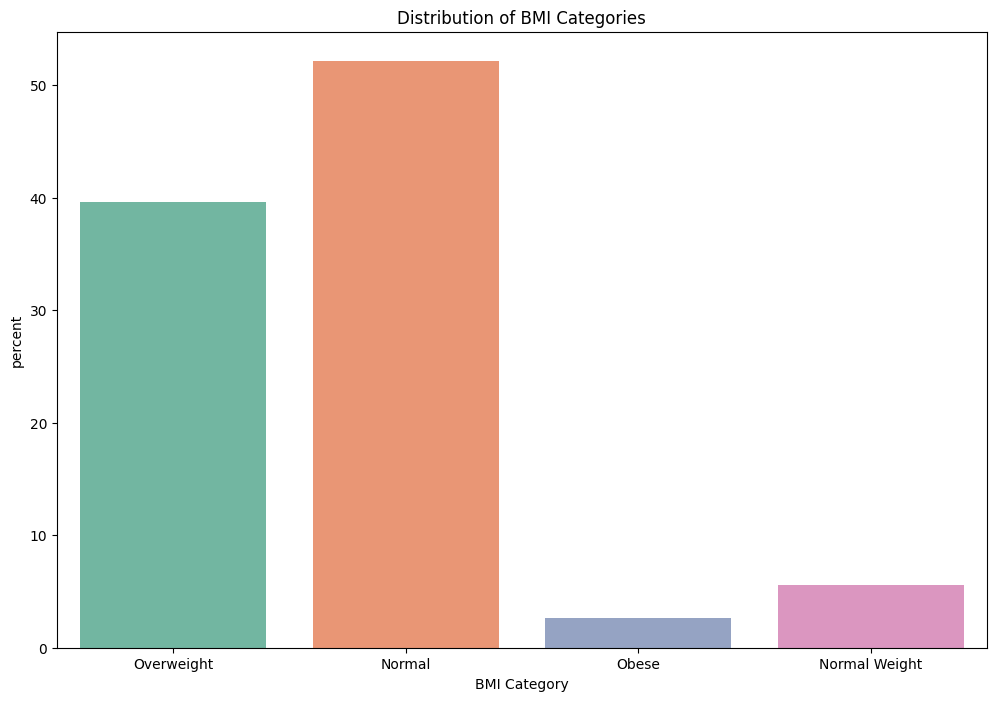

In [57]:
df['Sleep Disorder'].value_counts()
# we have 219 nan in sleep disorder columns. so we will fix it
df['Sleep Disorder'].fillna('Healthy', inplace=True)
# now it's okay.
# i think it's better to split blood pressure to sys and dis pressure.
df[['Systolic Pressure', 'Diastolic Pressure']
   ] = df['Blood Pressure'].str.split('/', expand=True)
df[['Systolic Pressure', 'Diastolic Pressure']] = df[[
    'Systolic Pressure', 'Diastolic Pressure']].astype(int)
# that's better.
# also we probably will need Pulse Pressure!
df['Palse Pressure'] = df['Systolic Pressure'] - df['Diastolic Pressure']
# veeery good!
# let's check Outliers.
df[['Sleep Duration', 'Heart Rate']].describe()

# Sleep Duration	Heart Rate
# min	5.800000	65.000000
# max	8.500000	86.000000
# i think it's okay and we don't have any wierd number.
df.duplicated().value_counts()
# False    374
# great. we don't have any duplicated data.

# let's examine BMI distribution.
plt.figure(figsize=(12, 8))
sns.countplot(df, x='BMI Category', stat='percent', palette='Set2')
plt.title('Distribution of BMI Categories')
# now our information is clearer. 40 percent is overweight, 50 percent is normal and very low percent are obese and normal weight

## 4️⃣ Univariate Analysis


Text(0.5, 1.0, 'Distribution of Gender')

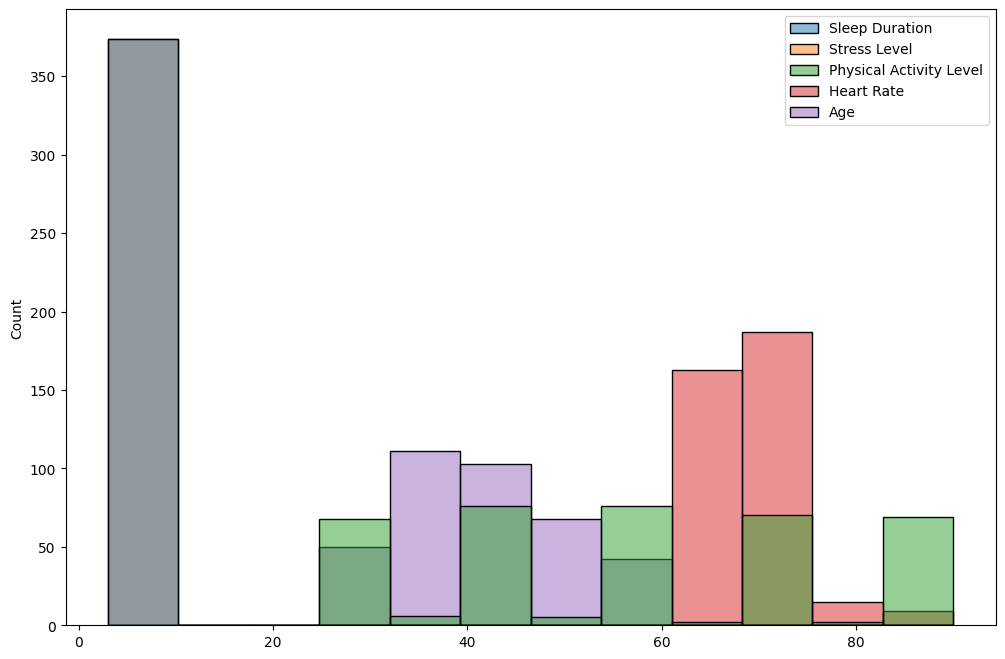

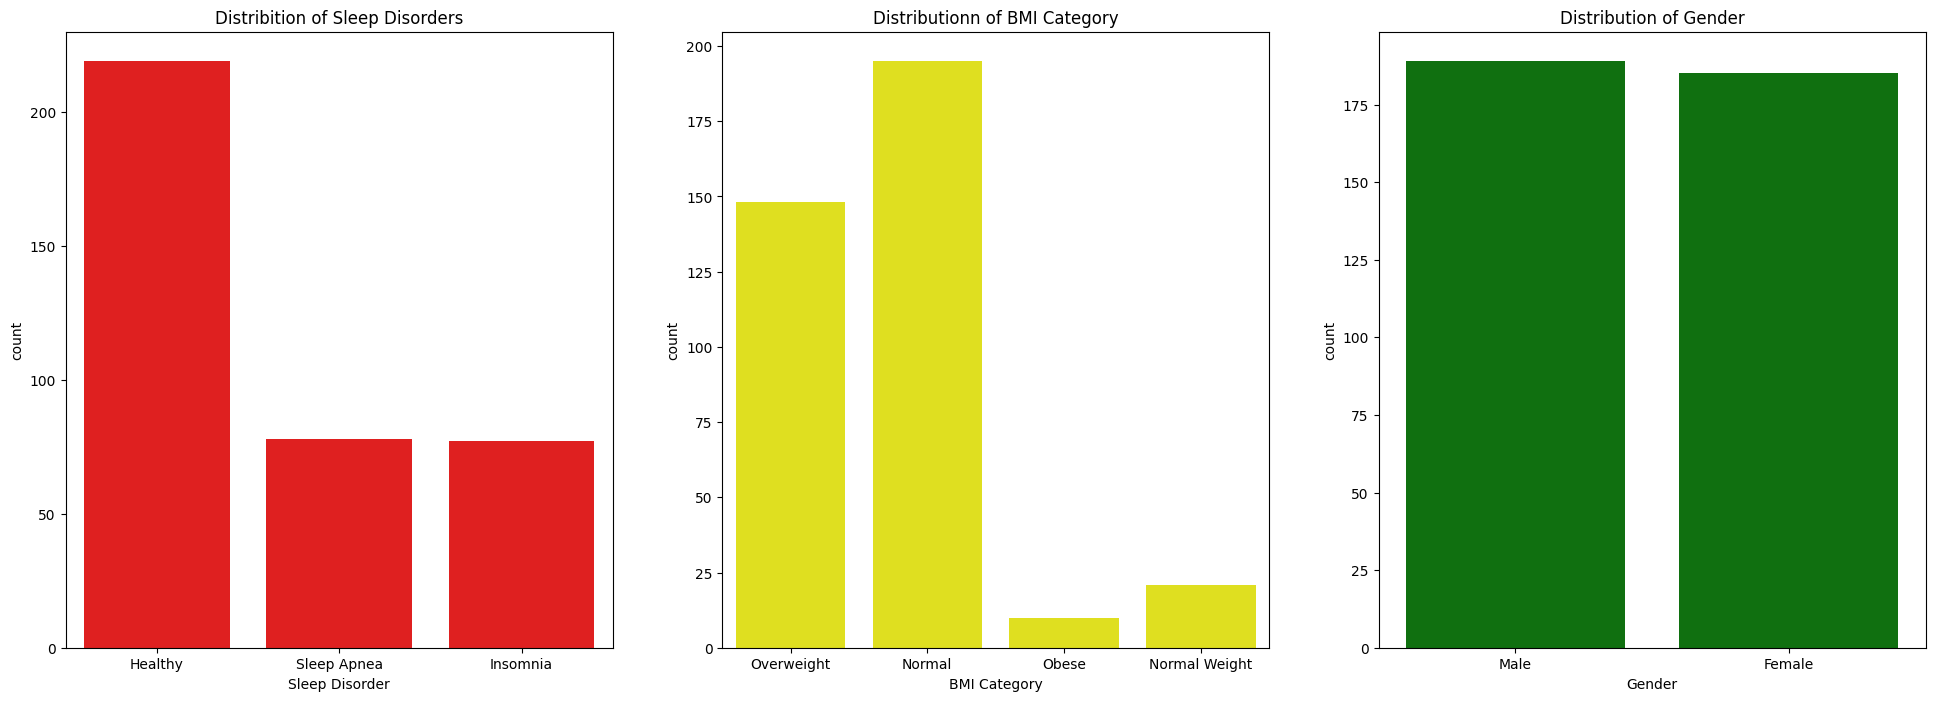

In [66]:
# let's create a beautiful histogram.
plt.figure(figsize=(12, 8))
sns.histplot(data=df[['Sleep Duration', 'Stress Level', 'Physical Activity Level',
                      'Heart Rate', 'Age']])
# And a countplot for our categorical elements ...
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
sns.countplot(data=df, x='Sleep Disorder', ax=axes[0], color='red')
axes[0].set_title('Distribition of Sleep Disorders')

sns.countplot(data=df, x='BMI Category', ax=axes[1], color='yellow')
axes[1].set_title('Distributionn of BMI Category')

sns.countplot(data=df, x='Gender', ax=axes[2], color='green')
axes[2].set_title('Distribution of Gender')

Text(0.5, 1.0, 'Relation Between quality of sleep and physical activity')

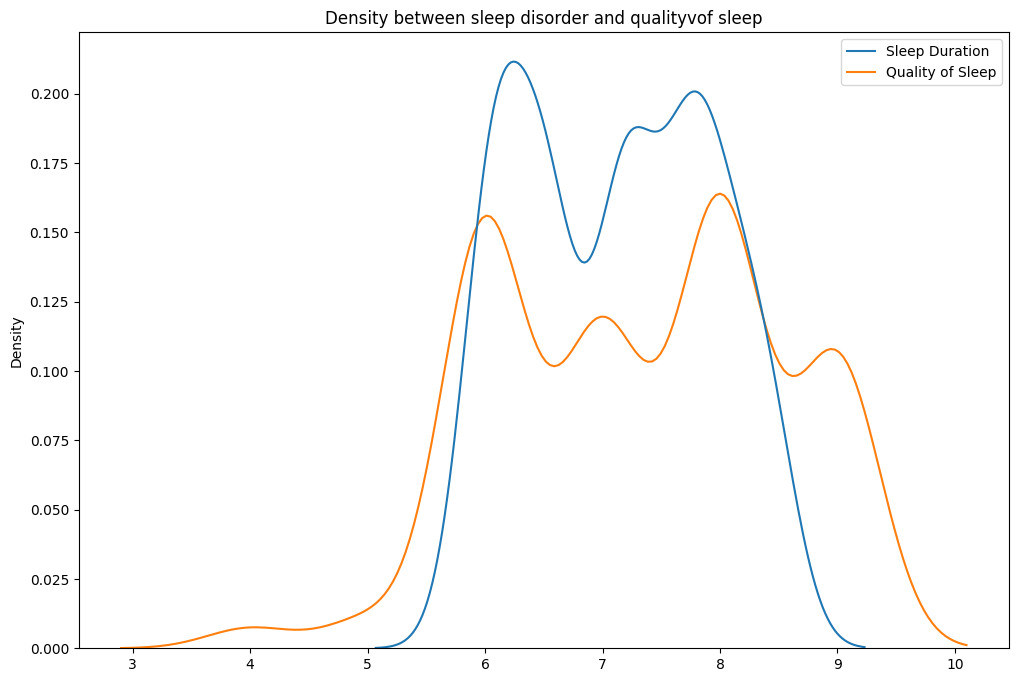

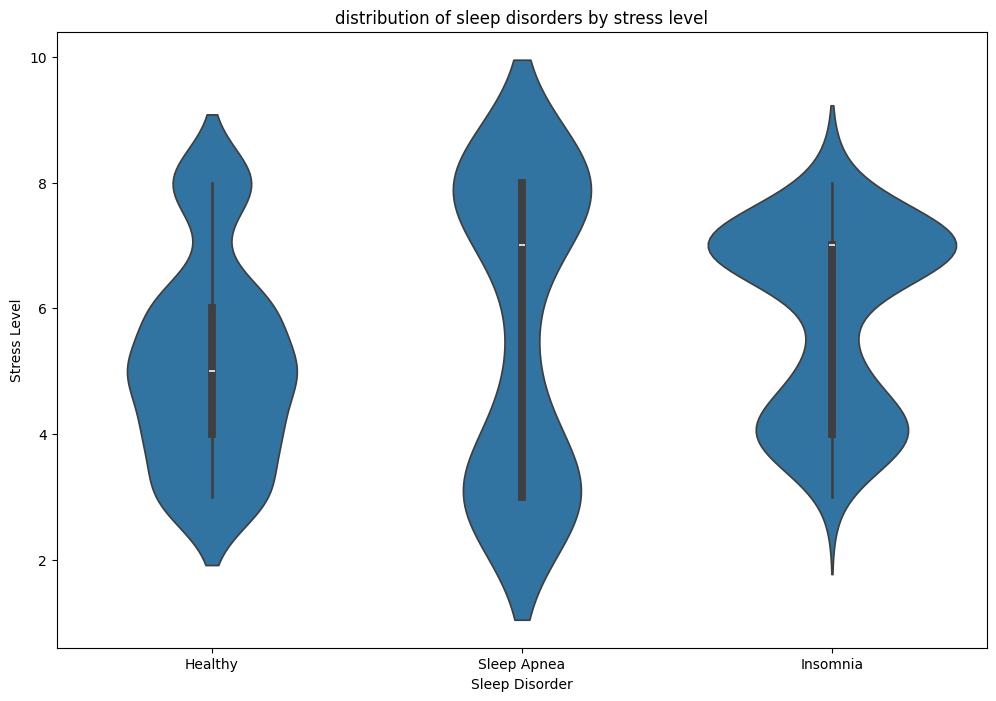

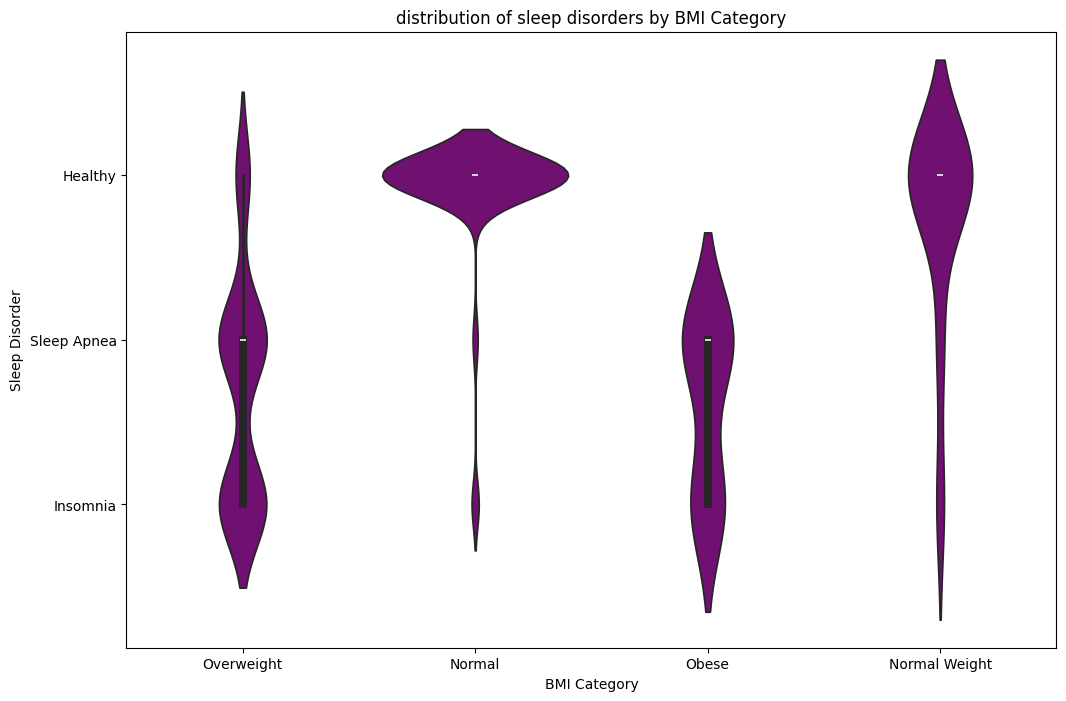

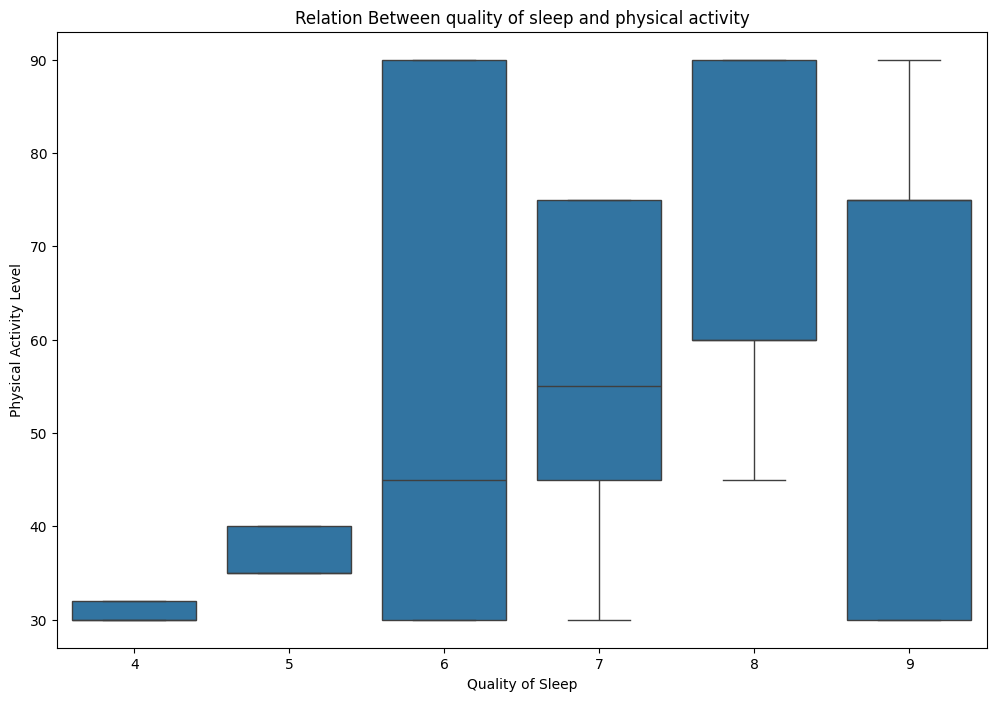

In [59]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df[['Sleep Duration', 'Quality of Sleep']])
plt.title('Density between sleep disorder and qualityvof sleep')
# we can see a good relation between sleep duration and quality of sleep.
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Sleep Disorder', y='Stress Level')
plt.title('distribution of sleep disorders by stress level')
# and in this plot we can see the high stress level in the people with sleep disorder more than healthy people.
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='BMI Category', y='Sleep Disorder', color='purple')
plt.title('distribution of sleep disorders by BMI Category')
# the healthiest people are in NORMAL BMI Category. so meaningful!
df.groupby('Sleep Disorder')['Age'].mean()
'''
Sleep Disorder
Healthy        39.036530
Insomnia       43.519481
Sleep Apnea    49.705128
Name: Age, dtype: float64

how much age is going up, diseases will come to you ):
'''

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Quality of Sleep', y='Physical Activity Level')
plt.title('Relation Between quality of sleep and physical activity')
# Great! Physical activity shows a mild positive association with sleep quality.

## 6️⃣ Correlation & Numerical Relationships


<Axes: >

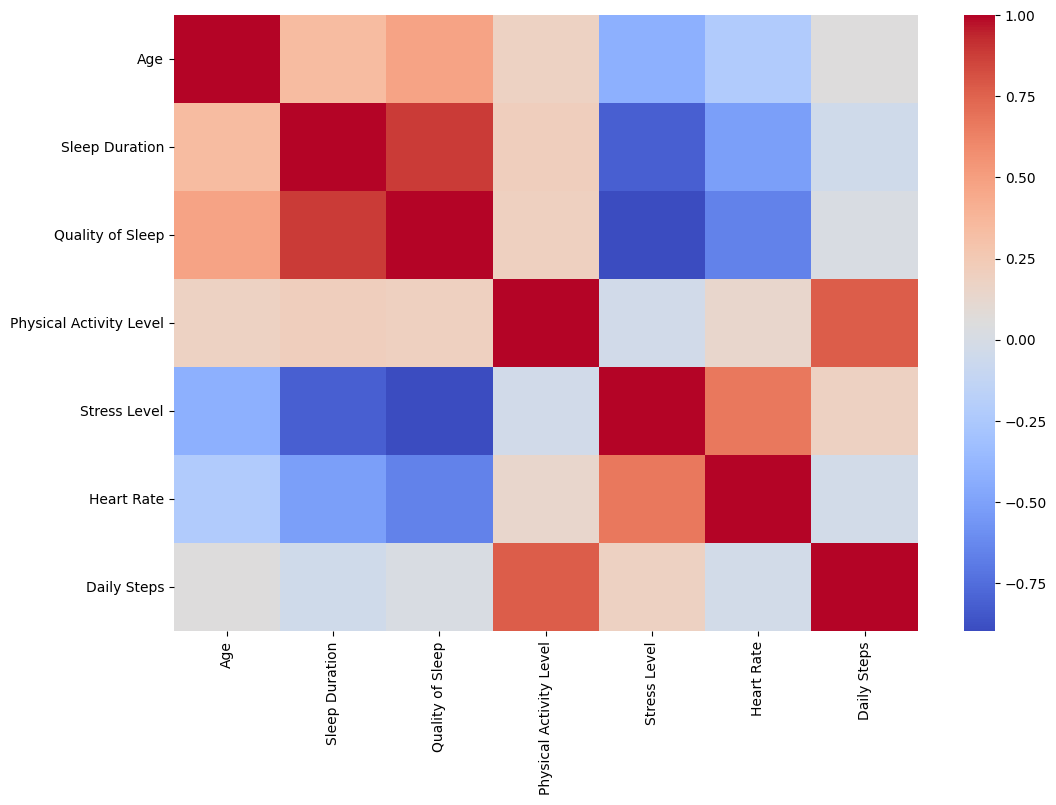

In [60]:
# let's create a correlation matri
Numerical_Culumns = ['Age', 'Sleep Duration', 'Quality of Sleep',
                     'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
corr_df = df[Numerical_Culumns].corr()
# now let's create a beautiful plot with it.
plt.figure(figsize=(12, 8))
sns.heatmap(corr_df, cmap='coolwarm')

# Strongest positive correlation: Sleep Duration & Quality of Sleep

# Strongest negative correlation: Stress Level & Quality of Sleep

# Notable weak relationships: High Age = High Quality of Sleep | High Heart Rate = Low Quality of Sleep

## 7️⃣ Risk Profiling


In [61]:
# it's time to create a risk profiling.
df['High-Risk'] = (
    (df['Stress Level'] > 7) &
    (df['Sleep Duration'] < 6) &
    (df['BMI Category'] != 'Normal')
)
df['High-Risk'].value_counts()
# False    368
# True       6
df['High-Risk'].value_counts(normalize=True) * 100
# 1.6 percent of people of our data has all three condition! thats so dangrous.
# let's take it some easier
df['Mild-Risk'] = (
    (df['Stress Level'] > 7) |
    (df['Sleep Duration'] < 6) |
    (df['BMI Category'] != 'Normal')
)
df['Mild-Risk'].value_counts()
# True     212
# False    162
df['Mild-Risk'].value_counts(normalize=True) * 100
# and now there is 56 percent. meaningful!
# let's examine some elements.
# df[df['High-Risk'] == True]['Sleep Disorder'].value_counts()
df.groupby('High-Risk')['Sleep Disorder'].value_counts(normalize=True) * 100
# High-Risk  Sleep Disorder
# False      Healthy           59.510870
#            Insomnia          20.652174
#            Sleep Apnea       19.836957
# True       Sleep Apnea       83.333333
#            Insomnia          16.666667

# 100% of high risk people have sleep disorder!
df.groupby('Mild-Risk')['Sleep Disorder'].value_counts(normalize=True) * 100

# Mild-Risk  Sleep Disorder
# False      Healthy           93.827160
#            Insomnia           3.703704
#            Sleep Apnea        2.469136
# True       Sleep Apnea       34.905660
#            Insomnia          33.490566
#            Healthy           31.603774
# 68.3% with sleep disorder!

# how about heart beat rate?
df[df['High-Risk'] == True]['Heart Rate'].mean()
# 82
df[df['Mild-Risk'] == True]['Heart Rate'].mean()
# 71.7
# so the heart rate of high risk people are really higher than healther people
df.groupby('Mild-Risk')['Sleep Disorder'].value_counts(normalize=True) * 100

Mild-Risk  Sleep Disorder
False      Healthy           93.827160
           Insomnia           3.703704
           Sleep Apnea        2.469136
True       Sleep Apnea       34.905660
           Insomnia          33.490566
           Healthy           31.603774
Name: proportion, dtype: float64

## 8️⃣ Key Insights & Business Interpretation

- What is the strongest factor associated with sleep disorders?
- Is physical activity protective?
- Does blood pressure play a role?
- Can the insurance company implement preliminary risk screening?


In [62]:
'''
Stress level appears to be one of the strongest lifestyle factors associated with 
insomnia,suggesting stress management may reduce risk.
as we saw, the strongest NEGATIVE factor associated with sleep disorders was sleep quality that has the best relation with
sleep duration and activity before sleeping.
physical activity based on our plots and numbers is absloutly protective aginst sleep disorders.
of course the blood pressure of the human can reduce the quality of sleep.
yes i guess the company can filter people with measuring they'r some elements like disorders or blood pressure and other
things for that.
THANK YOU FOR YOUR ATTENTION TO THIS MATTER
'''

"\nStress level appears to be one of the strongest lifestyle factors associated with \ninsomnia,suggesting stress management may reduce risk.\nas we saw, the strongest NEGATIVE factor associated with sleep disorders was sleep quality that has the best relation with\nsleep duration and activity before sleeping.\nphysical activity based on our plots and numbers is absloutly protective aginst sleep disorders.\nof course the blood pressure of the human can reduce the quality of sleep.\nyes i guess the company can filter people with measuring they'r some elements like disorders or blood pressure and other\nthings for that.\nTHANK YOU FOR YOUR ATTENTION TO THIS MATTER\n"